C:\Users\Harsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

Roc Auc: 0.60


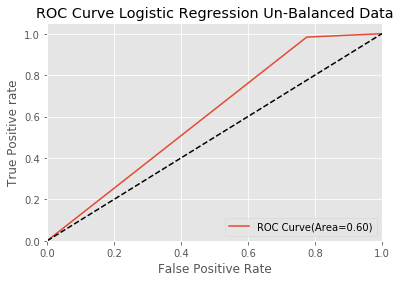

Roc Auc: 0.79


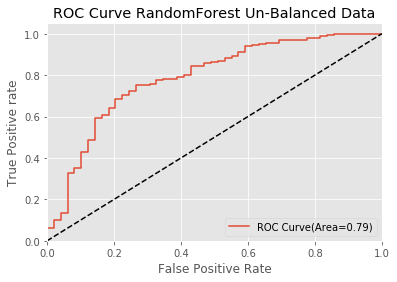

True        0    1
Predicted         
0          14    8
1          35  237
             precision    recall  f1-score   support

          0       0.64      0.29      0.39        49
          1       0.87      0.97      0.92       245

avg / total       0.83      0.85      0.83       294

ROC AUC:0.63


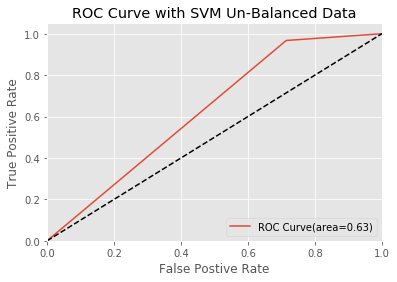

Roc Auc: 0.65


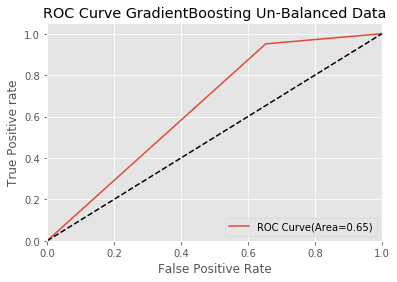

Roc Auc: 0.78


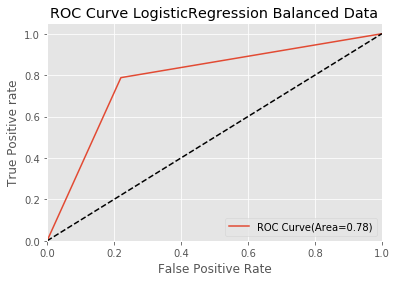

Roc Auc: 0.93


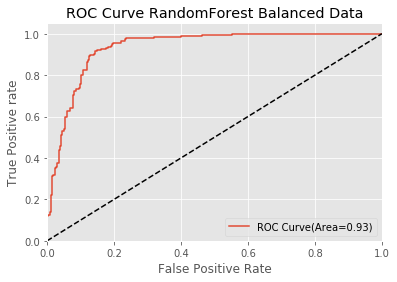

True         0    1
Predicted          
0          207   40
1           56  191
             precision    recall  f1-score   support

          0       0.84      0.79      0.81       263
          1       0.77      0.83      0.80       231

avg / total       0.81      0.81      0.81       494

ROC AUC:0.81


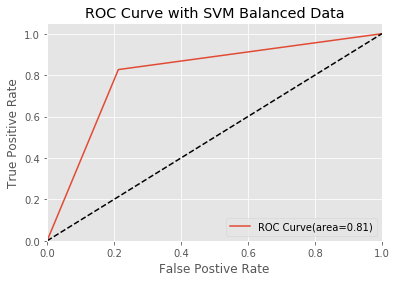

Roc Auc: 0.91


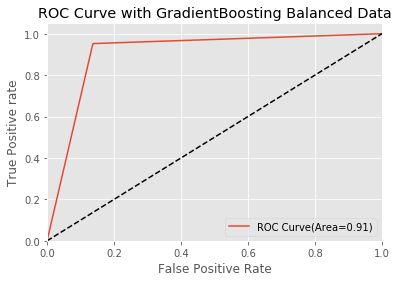

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model as skl_lm
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingRegressor,GradientBoostingClassifier,GradientBoostingRegressor

from sklearn.metrics import confusion_matrix,classification_report, mean_squared_error
import statsmodels.formula.api as sm
from imblearn.over_sampling import SMOTE
%matplotlib inline


plt.style.use('ggplot')

os.chdir(r"F:\DataScience\HRAttritionData")
emp=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#ALl features extracted on basis of EDA
final_features=["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome" ,"NumCompaniesWorked",
"PercentSalaryHike","RelationshipSatisfaction",
"StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany",
"YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager",
"EmployeeNumber","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","BusinessTravel","Department", "EducationField","OverTime","Gender","JobRole","MaritalStatus"]


emp_mod=emp.copy()
emp_mod=emp[final_features]

#Converting character features to numeric
emp_mod["BusinessTravel"] = emp_mod["BusinessTravel"].replace(["Travel_Rarely","Travel_Frequently","Non-Travel"],[0,1,2]);
emp_mod["MaritalStatus"] = emp_mod["MaritalStatus"].replace(["Single","Married","Divorced"],[0,1,2]);
emp_mod["Gender"] = emp_mod["Gender"].replace(["Female","Male"],[0,1]);
emp_mod["Department"] = emp_mod["Department"].replace(["Sales","Research & Development","Human Resources"],[0,1,2]);

emp_mod["EducationField"] = emp_mod["EducationField"].replace(["Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"],[0,1,2,3,4,5]);

emp_mod["OverTime"] = emp_mod["OverTime"].replace(["Yes","No"],[0,1]);

emp_mod["JobRole"] = emp_mod["JobRole"].replace(["Sales Executive","Sales Representative","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Research Director","Human Resources"],[0,1,2,3,4,5,6,7,8]);

y=emp['Attrition'].replace(["Yes","No"],[0,1]);

#Splitting the complete data in 80:20 ration for train and test datasets
X_train, X_test, y_train, y_test = train_test_split(emp_mod, y, test_size=.2,
                                                    random_state=0)
#Using Logistic Regression
regr=skl_lm.LogisticRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
#validation of Logistic
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve Logistic Regression Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()

#Using RandomForest 
model=RandomForestRegressor(max_depth=5,n_estimators=500,oob_score=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for RandomForest
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve RandomForest Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()

#AUC of 79% with RandomForest


#SVM 
from sklearn import svm
model_svm=svm.SVC(kernel='linear',probability=True)
model_svm.fit(X_train,y_train)
pred_svm=model_svm.predict(X_test)
cm_df_svm=pd.DataFrame(confusion_matrix(y_test,pred_svm).T)
cm_df_svm.index.name='Predicted'
cm_df_svm.columns.name='True'
print(cm_df_svm)
print(classification_report(y_test,pred_svm))
model_svm.score(X_test,y_test)
fpr,tpr,__=roc_curve(y_test,pred_svm)

#Calculate the AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC:%0.2f'%roc_auc)


#plot of a ROC Curve for a specific loss
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SVM Un-Balanced Data')
plt.legend(loc="lower right")
plt.show()

#Using GradientBoost for Classification for unbalanced Data
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for RandomForest
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve GradientBoosting Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()



#As the data for target is unbalanced creating balanced datasets using SMOTE
kind = ['svm'];
sm = [SMOTE(kind=k) for k in kind]
for method in sm:
    X_res, y_res = method.fit_sample(emp_mod, y)
    
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2,
                                                    random_state=0)

#Using Logistic Regression with Balanced Dataset after SMOTE Sampling
regr=skl_lm.LogisticRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
#validation of Logistic
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve LogisticRegression Balanced Data')
plt.legend(loc="lower right")

plt.show()


#Rerunning the same above two models using Balanced Dataset.
#Using RandomForest 
model=RandomForestRegressor(max_depth=5,n_estimators=500,oob_score=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for RandomForest
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve RandomForest Balanced Data')
plt.legend(loc="lower right")

plt.show()

#

#SVM 
from sklearn import svm
model_svm=svm.SVC(kernel='linear',probability=True)
model_svm.fit(X_train,y_train)
pred_svm=model_svm.predict(X_test)
cm_df_svm=pd.DataFrame(confusion_matrix(y_test,pred_svm).T)
cm_df_svm.index.name='Predicted'
cm_df_svm.columns.name='True'
print(cm_df_svm)
print(classification_report(y_test,pred_svm))
model_svm.score(X_test,y_test)
fpr,tpr,__=roc_curve(y_test,pred_svm)

#Calculate the AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC:%0.2f'%roc_auc)


#plot of a ROC Curve for a specific loss
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SVM Balanced Data')
plt.legend(loc="lower right")
plt.show()

#Using GradientBoost for Classification
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for RandomForest
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve with GradientBoosting Balanced Data')
plt.legend(loc="lower right")

plt.show()
